# Parkinsons Disease
The objective is to find a model which will be able to predict whether a person is likely to have parkinsons disease or not given their medical records. 
___

## Model Performamce
Accuracy, F1-Score and Recall were the metrics used to evaluate the performance of the model

| Method  Used  |  Accuracy of model (%)  | F1-Score of model (%) | Recall of model(%) |
|-----------|---------|-----------|---------|
| **Random Forest**   | **97.44**   | **98.41** | **100.00** |
| XGBoost | 89.74   | 93.94 | **100.00** |
| SVM | 89.74   | 93.33 | 90.32 |
___

### Steps to Solve Problem
* Import Dataset and Libraries
* Data Preprocessing
    * Train / Test Data split
    * Missing Data Imputation
    * Outlier Handling
    * Feature Scaling
    * Imbalanced Data
* Model Build
    * Model Initiation and Fitting
    * Test predictions
* Model Perfromance
    * Recall
    * Case Prediction
        


### Import Libraries and Dataset

This paper focuses on the comparative study of the 3 machine learning algorithms ie; Random Forest , XGBoost and SVM and thus finding the most accurate algorithm for the prediction of presence of parkinsons disease and creating the model for the same.

In [328]:
import pandas as pd # for data manipulation
import numpy as np # for numerical analysis

# For plottling graphs
import seaborn as sns 
import matplotlib.pyplot as plt

# for saving tools
import joblib

In [329]:
# Setting Plotting Settings
%matplotlib inline
sns.set_style("darkgrid")

Import Dataset

In [330]:
parkinsons = pd.read_csv("parkinsons.csv")

In [331]:
# Checking First 5 rows of data
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Checking basic information about the dataset

In [332]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [333]:
parkinsons.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

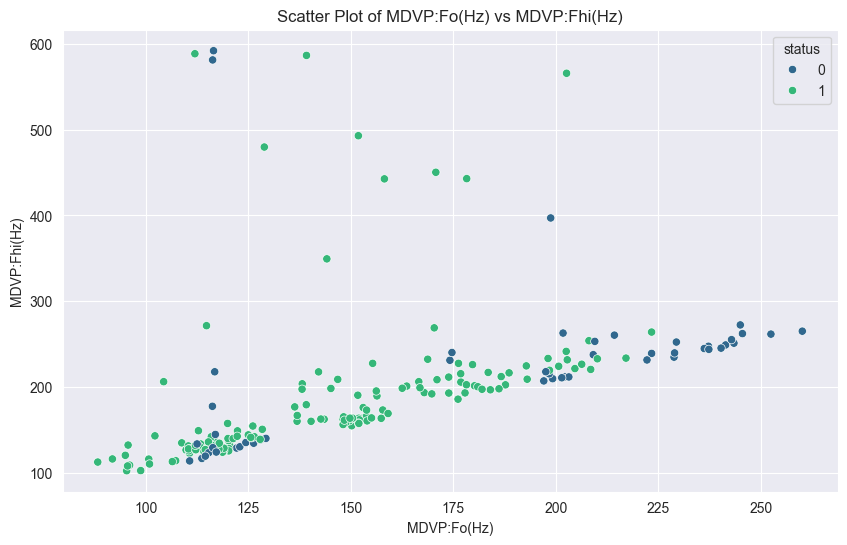

In [334]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=parkinsons, x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', hue='status', palette='viridis')
plt.title('Scatter Plot of MDVP:Fo(Hz) vs MDVP:Fhi(Hz)')
plt.show()

# From the above plot, we can see that the people without Parkinsons 
# have their fundamental frequencies that is either high or very low 
# and the percentage of jitter is usually lower that 0.005%.

### Data Preprocessing

#### Data Shuffle and Split
It is good pratice to split the dataset before preprocessing to avoid data leakage, shuffling the data adds randomness which can boost model performance

In [335]:
# Shuffling the data
parkinsons = parkinsons.sample(frac=1, random_state=42).copy()

In [336]:
# Splitting the data into train and test data 
#test data is 20% and train data is 80%
from sklearn.model_selection import train_test_split
X = parkinsons.drop(["name", "status"], axis=1) 
y = parkinsons["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [337]:
# Setting the train data to variable name "parkinsons" for data preprocessing
parkinsons = X_train.copy()
parkinsons

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
104,154.003,160.267,128.621,0.00183,0.00001,0.00076,0.00100,0.00229,0.01030,0.094,...,0.00871,0.01406,0.00243,28.409,0.263654,0.691483,-7.111576,0.144780,2.065477,0.093193
194,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.190,...,0.01373,0.03078,0.04398,21.209,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569
159,127.930,138.752,112.173,0.00605,0.00005,0.00321,0.00318,0.00962,0.03235,0.339,...,0.03105,0.04079,0.02663,19.651,0.654945,0.675865,-5.498456,0.234196,2.103014,0.216638
179,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01095,0.01672,0.00703,24.775,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,145.174,198.109,80.637,0.00733,0.00005,0.00414,0.00422,0.01242,0.02362,0.233,...,0.01944,0.03706,0.01874,18.857,0.637518,0.735546,-5.594275,0.127950,1.765957,0.222716
103,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,0.107,...,0.01009,0.01567,0.00495,26.759,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
13,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
69,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,0.497,...,0.03635,0.10070,0.02431,21.718,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958


In [338]:
y_train

104    1
194    0
159    1
179    1
188    0
      ..
125    1
103    1
13     1
69     1
51     0
Name: status, Length: 136, dtype: int64

In [339]:
parkinsons.iloc[0]

MDVP:Fo(Hz)         154.003000
MDVP:Fhi(Hz)        160.267000
MDVP:Flo(Hz)        128.621000
MDVP:Jitter(%)        0.001830
MDVP:Jitter(Abs)      0.000010
MDVP:RAP              0.000760
MDVP:PPQ              0.001000
Jitter:DDP            0.002290
MDVP:Shimmer          0.010300
MDVP:Shimmer(dB)      0.094000
Shimmer:APQ3          0.004690
Shimmer:APQ5          0.005820
MDVP:APQ              0.008710
Shimmer:DDA           0.014060
NHR                   0.002430
HNR                  28.409000
RPDE                  0.263654
DFA                   0.691483
spread1              -7.111576
spread2               0.144780
D2                    2.065477
PPE                   0.093193
Name: 104, dtype: float64

#### Handling of Missing data 


In [340]:
# Extracting features
features = [feature for feature in parkinsons.columns]

There is no missing data in this dataset

In [341]:
# Check total of missing values
parkinsons.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### Feature Scaling
Scaling values to a range of -3 to 3, so as to boost model perfomance

In [342]:
# import library for scaling
from sklearn.preprocessing import StandardScaler

In [343]:
# initialize and scale values
scaler = StandardScaler()
scaler.fit(parkinsons[features])
parkinsons[features] = scaler.transform(parkinsons[features])

In [344]:
joblib.dump(scaler, "tools/scaler_joblib")

['tools/scaler_joblib']

### Class Imbalance

In [345]:
#  Ratio of No Parkinson to Parkinson
y_train.value_counts(normalize=True)

status
1    0.720588
0    0.279412
Name: proportion, dtype: float64

In [346]:
# joining the data together
parkinsons = pd.concat([parkinsons, y_train], axis=1)

In [347]:
# Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=51)
X = parkinsons.drop("status", axis=1) 
y = parkinsons["status"]
X_train, y_train = smote.fit_resample(X, y)

In [348]:
#  Ratio of No Diabetes to Diabetes
y_train.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

### Model Building

#### Preprocessing Test data

In [349]:
X_test[features] = scaler.transform(X_test[features]) # scaling features

In [350]:
# checking first 5 rows of data
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
178,-0.078983,-0.424096,0.577455,-0.641140,-0.681575,-0.586188,-0.585173,-0.586291,-0.731299,-0.726882,...,-0.685387,-0.684640,-0.481387,0.505193,-0.868777,0.788958,-0.548941,-0.496445,-0.276812,-0.484934
171,-0.990226,-0.674915,-0.210032,-0.546795,-0.405371,-0.539655,-0.570558,-0.538649,-0.853400,-0.798805,...,-0.800017,-0.864443,-0.493796,0.945957,-0.768901,0.685505,-0.559302,-0.044381,-0.423643,-0.484178
137,-0.974662,-0.706076,-0.329357,-0.245302,-0.129166,-0.237188,-0.124773,-0.236180,1.363067,1.120996,...,1.230769,1.424800,0.268340,-1.164005,1.209833,-0.170949,0.938417,1.013265,0.785916,0.747914
15,-0.245502,0.169157,-0.743844,-0.518081,-0.405371,-0.569569,-0.523056,-0.569672,-0.771434,-0.815403,...,-0.651473,-0.753690,-0.399202,0.671351,0.655235,-1.068176,0.323383,-0.152352,-0.393000,0.317826
157,-0.854053,-0.666533,-0.327369,2.443521,2.909082,2.621289,1.358742,2.621214,1.155609,0.910758,...,0.404617,1.131167,1.920924,-0.657039,1.258213,-1.272284,2.024850,1.002183,1.523864,0.606540


In [351]:
X_test.shape

(59, 22)

#### Random Forest

Import Model

In [352]:
from sklearn.ensemble import RandomForestClassifier

In [353]:
model = RandomForestClassifier(random_state=51, n_jobs=-1)

Train model and make predictions

In [354]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [355]:
predictions = model.predict(X_test)

#### RF Performance

In [356]:
# libraries to check performance
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,  recall_score

In [357]:
# for 30 % test , accuracy_score = 91%
# for 15 % test , accuracy_score = 93.3%    , for 10& test, accuracy si 90%


In [358]:
print(f"The accuracy of RF is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score of RF is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall of RF is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy of RF is 91.53 %
The f1 score of RF is 94.74 %
The recall of RF is 91.84 %


Confusion matrix

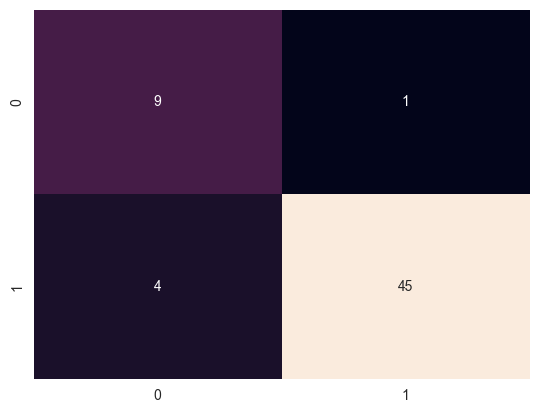

In [359]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

XGboost

Import Model

In [360]:
from xgboost import XGBClassifier

In [361]:
xgb = XGBClassifier(random_state=51)

Train model and make predictions

In [362]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=51, ...)

In [363]:
predictions = xgb.predict(X_test)

#### XGBoost Performance

In [364]:
print(f"The accuracy of XGBoost is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score of XGBoost is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall of XGBoost is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy of XGBoost is 91.53 %
The f1 score of XGBoost is 94.95 %
The recall of XGBoost is 95.92 %


Confusion Matrix

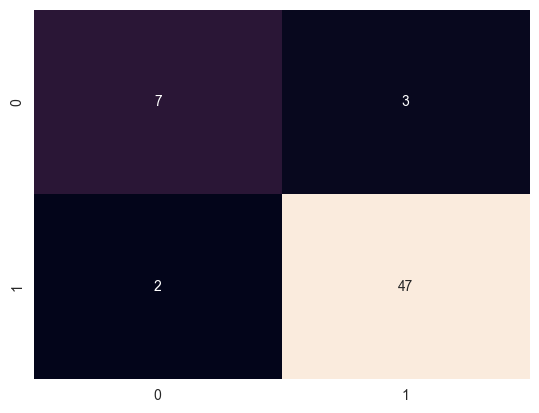

In [365]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### SVM

Import Model

In [366]:
from sklearn.svm import SVC

In [367]:
svm = SVC()

Train model and make predictions

In [368]:
svm.fit(X_train, y_train)

SVC()

In [369]:
predictions = svm.predict(X_test)

#### SVM Performance

In [370]:
print(f"The accuracy of SVM is {accuracy_score(y_test, predictions) * 100:.2f} %")
print(f"The f1 score of SVM is {f1_score(y_test, predictions) * 100:.2f} %") 
print(f"The recall of SVM is {recall_score(y_test, predictions) * 100:.2f} %")

The accuracy of SVM is 86.44 %
The f1 score of SVM is 91.30 %
The recall of SVM is 85.71 %


Confusion Matrix

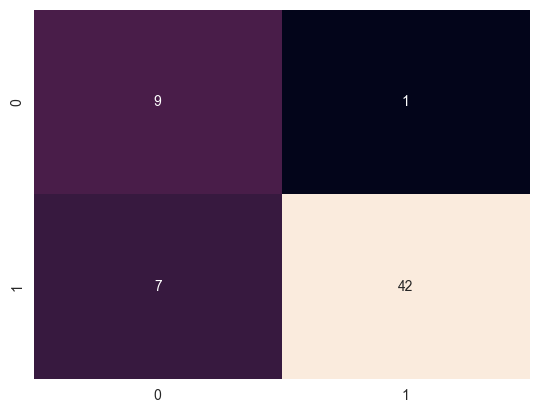

In [371]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);
# TN   FP
# FN*   TP - Recall

### Most important features
Here we check the top 10 most important features that contribute to the prediction of parkinsons
* spread1
* MDVP:Fo(Hz)
* PPE
* MDVP:Fhi(Hz)
* spread2
* MDVP:APQ
* MDVP:Flo(Hz)
* Shimmer:APQ5
* MDVP:PPQ
* MDVP:Shimmer


In [372]:
importance_df = pd.DataFrame({
    "Feature" : features,
    "Importance" : model.feature_importances_}).sort_values("Importance", ascending=False)

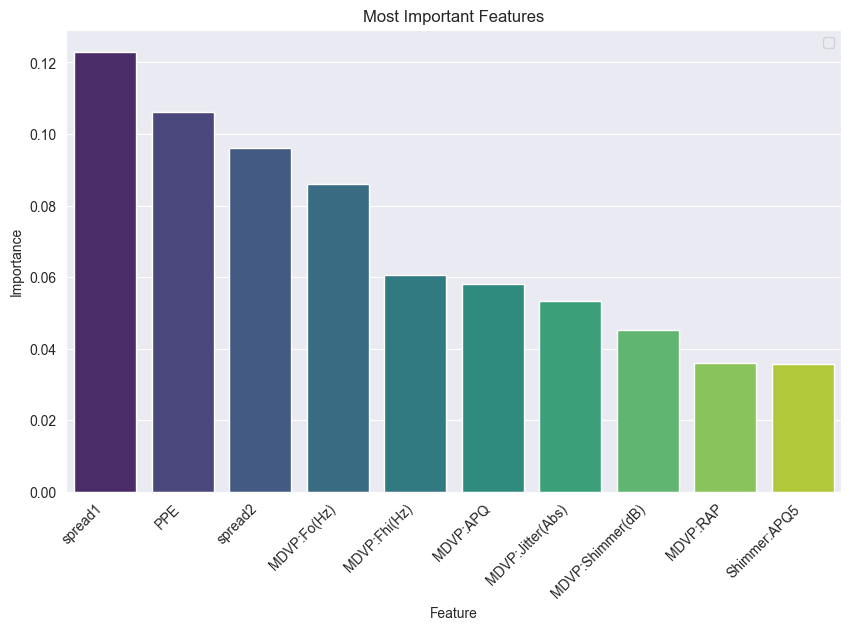

In [373]:
plt.figure(figsize=[10,6])
plt.title("Most Important Features")
colors = sns.color_palette("viridis", n_colors=len(importance_df.head(10)))

sns.barplot(data=importance_df.head(10), x="Feature", y="Importance", palette=colors, hue="Feature", dodge=False);
plt.xticks(rotation=45, ha="right");  # Rotate x-axis labels for better readability
plt.xlabel("Feature");
plt.ylabel("Importance");
plt.legend(labels=[]);  # Explicitly pass an empty list to suppress the warning
  # Hide legend as it's not necessary when each bar corresponds to a single feature


### Saving The Model

Random Forest had the best recall and F1 score so that would be our final model

In [374]:
joblib.dump(model, "tools/model_joblib")

['tools/model_joblib']